**dataset : https://www.kaggle.com/datasets/omkargurav/face-mask-dataset**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3248.jpg
/kaggle/input/face-mask-dataset/data/with_mask/with_mask_3326.jpg


In [ ]:
import tensorflow
from tensorflow import keras

2024-06-01 13:49:28.592657: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-01 13:49:28.592762: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-01 13:49:28.696445: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
keras.utils.set_random_seed(7)
random.seed(7)
np.random.seed(7)
tensorflow.random.set_seed(7)

In [ ]:
data=[]
categories=['with_mask','without_mask']
for category in categories:
    path=os.path.join('/kaggle/input/face-mask-dataset/data',category)

    if category == 'with_mask':
        label=0
    else:
        label=1

    for file in os.listdir(path):
        img_path=os.path.join(path,file)
        img=cv2.imread(img_path)
        # img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img=cv2.resize(img,(128,128))
        data.append([img,label])

random.Random(4).shuffle(data)

X=[]
y=[]
for feature,label in data:
    X.append(feature)
    y.append(label)
X=np.array(X)
y=np.array(y)
X=X/255
data=None

X.shape,y.shape

((7553, 128, 128, 3), (7553,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.shape,y_train.shape

((6042, 128, 128, 3), (6042,))

### resnet

In [ ]:
# import tensorflow
# from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,GlobalAveragePooling2D,BatchNormalization,Dropout


In [ ]:
from keras.applications import ResNet50
from keras.applications import ResNet152V2

In [ ]:
base=ResNet152V2(include_top=False,
              weights="imagenet",
             input_shape=(128,128,3))

234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
#option 1
base.trainable=False

In [ ]:
model=Sequential()
model.add(base)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(1024,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet152v2 (Functional)        │ ?                      │    58,331,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,331,648 (222.52 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 58,331,648 (222.52 MB)

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
epochs=20
history=model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

Epoch 1/20
  2/189 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.6016 - loss: 0.5569   

I0000 00:00:1717249864.431664     104 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717249864.521067     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.9466 - loss: 0.4794

W0000 00:00:1717249895.844475     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


189/189 ━━━━━━━━━━━━━━━━━━━━ 72s 212ms/step - accuracy: 0.9467 - loss: 0.4787 - val_accuracy: 0.9868 - val_loss: 0.0731
Epoch 2/20
  3/189 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.9688 - loss: 0.0714     

W0000 00:00:1717249904.452546     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


189/189 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.9851 - loss: 0.0617 - val_accuracy: 0.9795 - val_loss: 0.1347
Epoch 3/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.9923 - loss: 0.0428 - val_accuracy: 0.9841 - val_loss: 0.2297
Epoch 4/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.9975 - loss: 0.0229 - val_accuracy: 0.9702 - val_loss: 0.5568
Epoch 5/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.9983 - loss: 0.0319 - val_accuracy: 0.9801 - val_loss: 0.1885
Epoch 6/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.9986 - loss: 0.0050 - val_accuracy: 0.9835 - val_loss: 0.2490
Epoch 7/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.9980 - loss: 0.0387 - val_accuracy: 0.9808 - val_loss: 0.2050
Epoch 8/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.9981 - loss: 0.0659 - val_accuracy: 0.9709 - val_loss: 0.4829
Epoch 9/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.9923 - loss: 0.1287 - val_accurac

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

In [ ]:
y_prob=model.predict(X_test)
y_pred=np.where(y_prob>0.5,1,0)

 5/48 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step

W0000 00:00:1717250137.239594     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 232ms/step


W0000 00:00:1717250148.147174     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [ ]:
acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print(f"accuracy is {acc*100:.2f}%")
print(f"recall is {recall*100:.2f}%")
print(cm)

accuracy is 98.74%
recall is 98.79%
[[755  10]
 [  9 737]]


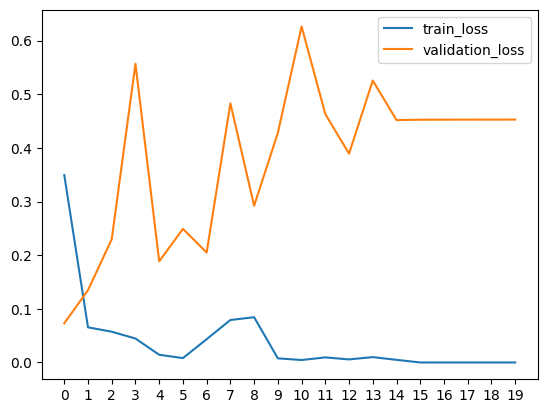

In [ ]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='validation_loss')
plt.legend()
plt.xticks(np.arange(0, epochs, 1))
plt.show()

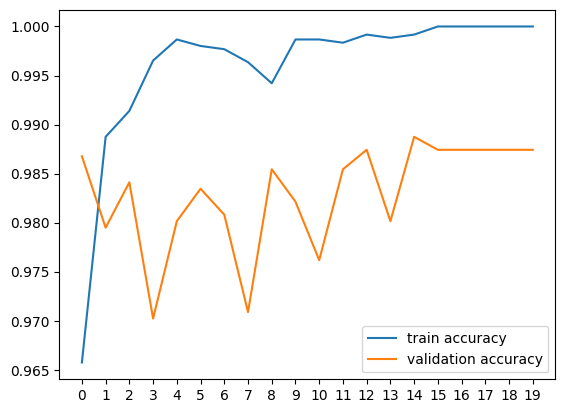

In [ ]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.xticks(np.arange(0, epochs, 1))
plt.show()